## Network Graphs

This exercise will present a way to visualize a network, tree and/or hierarchical dataset. Of course this can also be done in multiple ways but we will be focussing on the network graph visualizations. A network graph will consist of a set of nodes (representing entities, e.g. persons) and edges between the nodes (representing the relations between entities, e.g. ancestral links between persons or facebook connections).

For this exercise we are going to visualize a co-authorship network of scientists working on network theory, compiled by M. Newman in May 2006, with the python network graph visualization package **Networkx**.

First we need to import all the necessary python packages and modules.

In [1]:
# Lets clear all previous python imports and variables by resetting the python kernel.
%reset -f

%matplotlib nbagg

import matplotlib               # Matplotlib is the core package to plot publication grade images
import matplotlib.pyplot as plt # # Pyplot: a collection functions that make matplotlib work like MATLAB
import networkx as nx           # The network graph visualisation module

matplotlib.style.use('classic') # this will use the classic matplotlib style which has borders around the drawn node

Now we will load the data and prepare some variables before we draw the network.

In [2]:
# Read the graphml file from the server and format to a networkx graph
g = nx.read_graphml('./data/networks/networkcitnetwork.graphml')

# Print some statistics of the graph
print('{}\n'.format(g))

# Print the first 10 nodes and edges of the graph
print('FIRST 10 NODES: \n{}\n  .... \n'.format(list(g.nodes(data=True))[:10]))
print('FIRST 10 EDGES: \n{}\n  .... \n'.format(list(g.edges(data=True))[:10]))

# A list for the size of every node in the graph based on their degree (the amount of connected neighbours)
# We add one or else nodes with no neighbours would have size 0
nodeSizes  = [10*(len(g[node[0]])+1) for node in g.nodes(data=True)] 

# A list for the color of every node in the graph based on their degree (the amount of connected neighbours)
nodeValuesColorMapping = nodeSizes

# A dictionary with key:nodeId and value:labelname to label each node in the visualisation
labels     = {node[0]: node[1]['label'] for node in g.nodes(data=True)}

Graph with 1589 nodes and 2742 edges

FIRST 10 NODES: 
[('0.0', {'label': 'ABRAMSON, G', 'size': 6.8235292, 'r': 221, 'g': 241, 'b': 240, 'x': 3902.1426, 'y': 2994.4763}), ('1.0', {'label': 'KUPERMAN, M', 'size': 9.735294, 'r': 213, 'g': 238, 'b': 235, 'x': 3897.829, 'y': 2992.4802}), ('2.0', {'label': 'ACEBRON, J', 'size': 12.6470585, 'r': 205, 'g': 235, 'b': 230, 'x': 1283.9408, 'y': -8487.224}), ('3.0', {'label': 'BONILLA, L', 'size': 12.6470585, 'r': 205, 'g': 235, 'b': 230, 'x': 1274.209, 'y': -8496.897}), ('4.0', {'label': 'PEREZVICENTE, C', 'size': 12.6470585, 'r': 205, 'g': 235, 'b': 230, 'x': 1293.5586, 'y': -8496.948}), ('5.0', {'label': 'RITORT, F', 'size': 12.6470585, 'r': 205, 'g': 235, 'b': 230, 'x': 1293.5775, 'y': -8477.623}), ('6.0', {'label': 'SPIGLER, R', 'size': 12.6470585, 'r': 205, 'g': 235, 'b': 230, 'x': 1274.2706, 'y': -8477.616}), ('7.0', {'label': 'ADAMIC, L', 'size': 12.6470585, 'r': 205, 'g': 235, 'b': 230, 'x': -3337.5085, 'y': 1070.1571}), ('8.0', {'label

The statistics shows us the number of nodes, the number of edges and the average degree, which is the average number of edges attached to the nodes. The output of the graph nodes and edges prints show us that the graph is nothing more that a list of nodes with an ID and attributes and a list of edges referencing to nodes that are linked. With the above prepared graph and variables we can call the graph drawing function of Networkx.

<IPython.core.display.Javascript object>


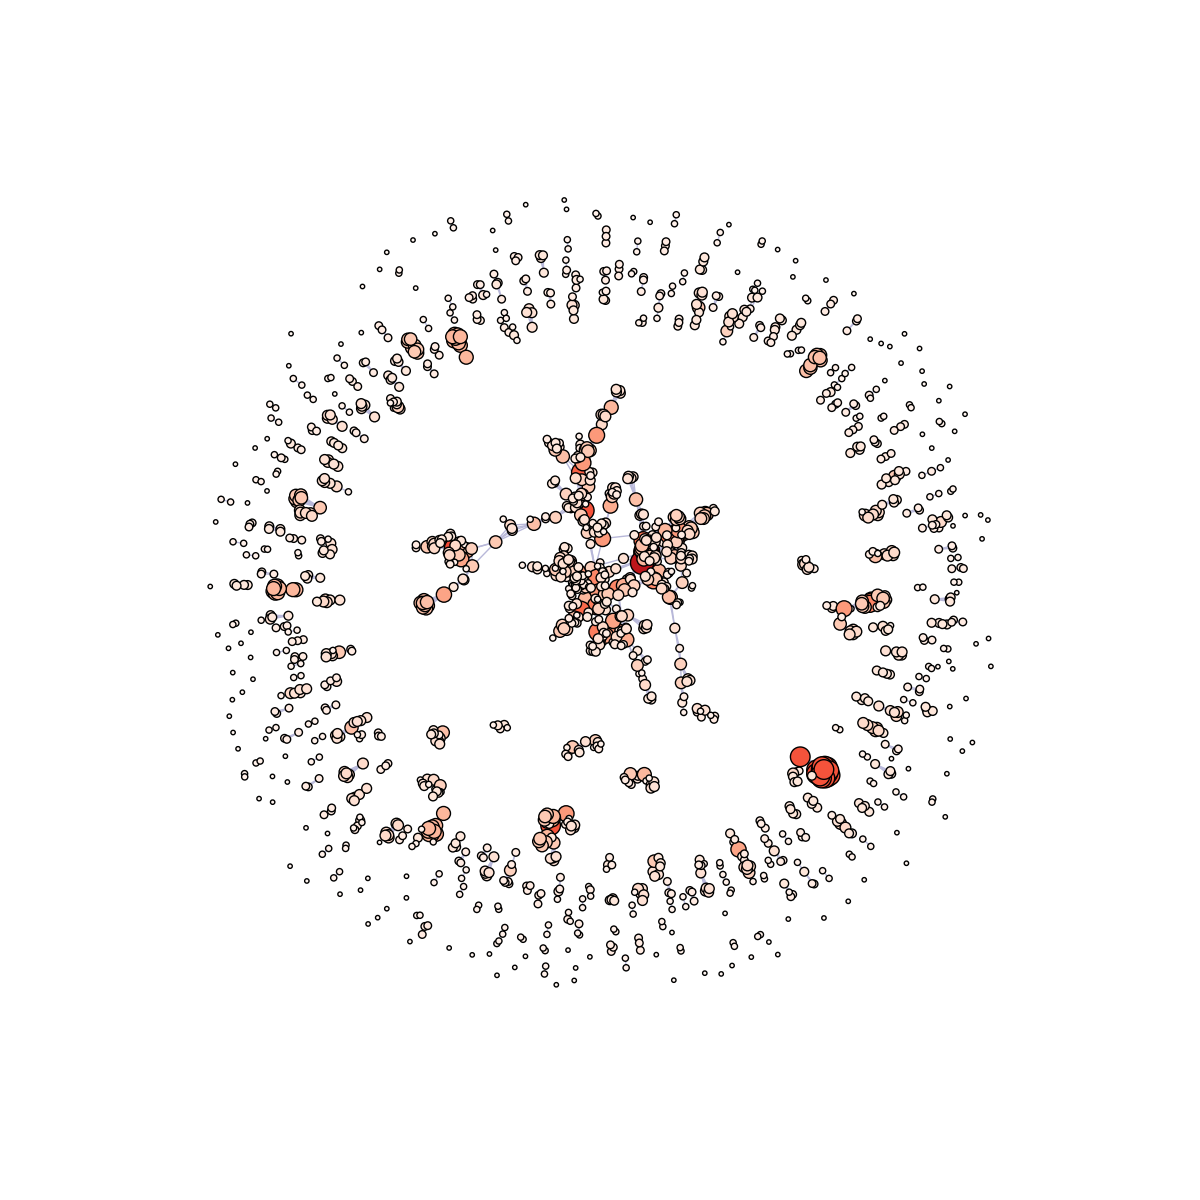

In [3]:
layoutFig = plt.figure(figsize=(12,12))
            
nx.draw(g,            
         with_labels=False,                 # Turn off the labels for initial view (reduces visual clutter)
         labels=labels,                     # Give the label of each node
         node_size=nodeSizes,               # Give the node sizes
         node_color=nodeValuesColorMapping, # Give the values for the color mapping
         cmap=plt.cm.Reds,                  # PyPlot colormap called Reds (color map from light red to dark red)
         edge_color=matplotlib.colors.rgb2hex(plt.cm.Purples(100)) # Give the edge color (light purple)
    )

As you can see the graph is neatly spread out by the spring layout algorithm, which is based [Fruchterman-Reingold  Force-directed graph drawing](https://en.wikipedia.org/wiki/Force-directed_graph_drawing). You can zoom in and out by selecting the rectangle button on the button and have a look at the sub-graphs in the center. 

Within the network graph of network graph researcher you can see all types of structures. First of it is obvious that there are a lot of small individual groups working only with each other and not with the rest of the network. These are probably individual research groups within universities. Besides the individual group you have off course the main big group in the middle and if you look carefully by zooming in these also consists of smaller sub-groups where usually one of the members of the group is a connecting component between the two groups. This is off course what you want to strive for with your research because it gives coverage and thus more citations to spread your knowledge in this case about network graphs.

Thus you might say that the degree within this network is something you want to strive for so that is what we are gonna look at next. One way to reveal all the degrees within the graph is to make a plot of the **Degree Histogram**. We are going to try and plot it with Pandas we used previously and plot it with a **Bar Chart**.  

<IPython.core.display.Javascript object>


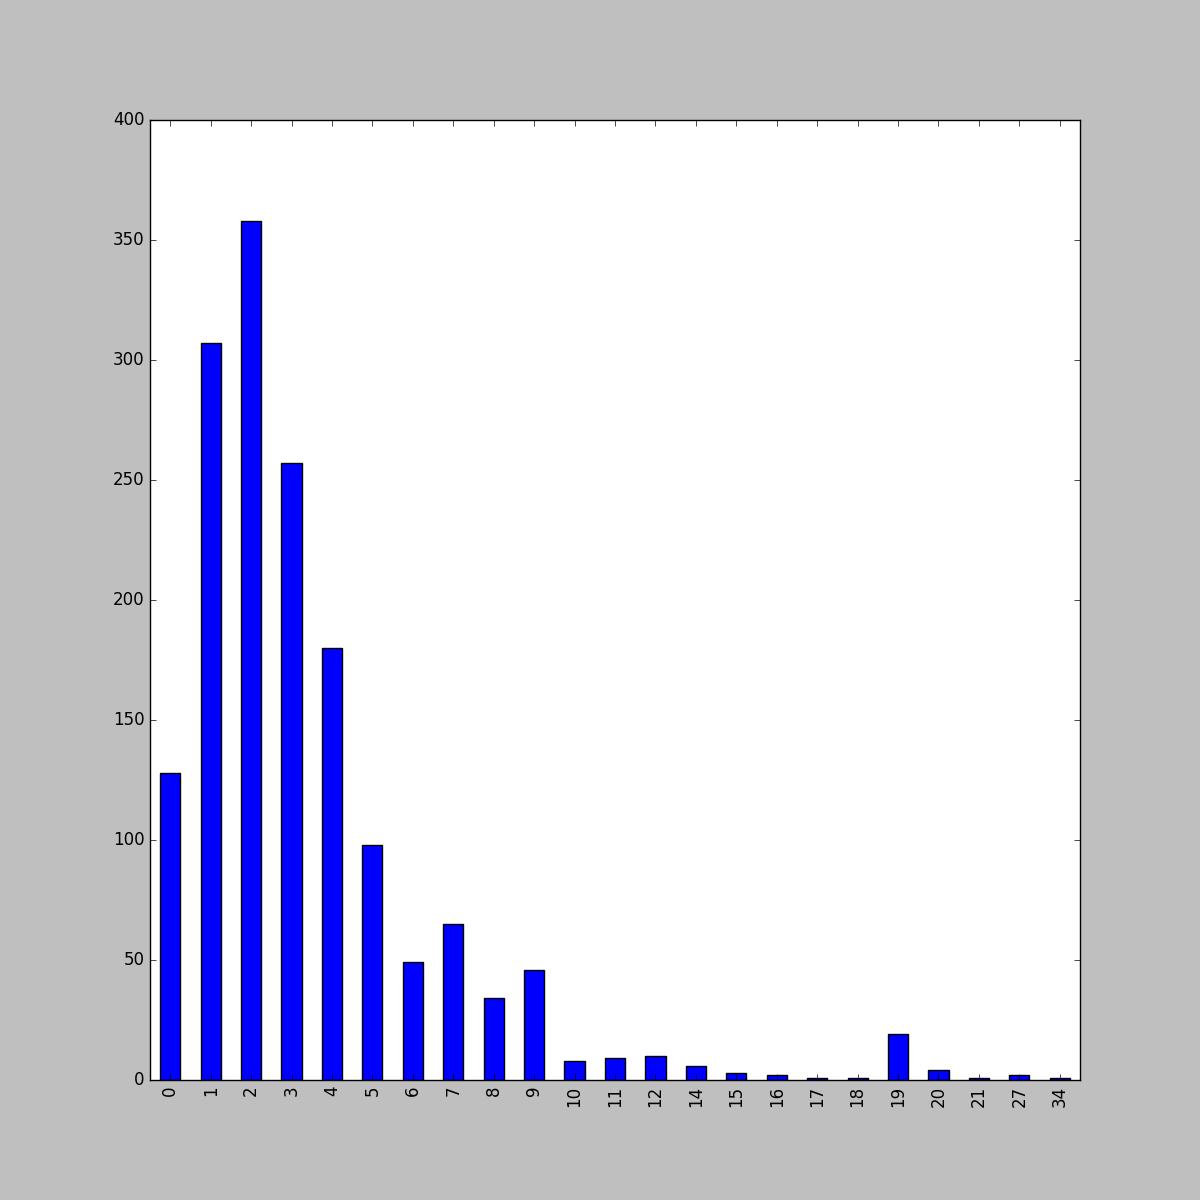

In [4]:
import pandas       # import pandas for data series creation and bar chart plotting
import collections  # we use the package collections to do some list operations

# First make a new figure for the plot
degreeHistoPlotFig = plt.figure(figsize=(12,12)); 

# Now lets create a list of all the degrees of each node
degree_sequence=sorted([degree for node, degree in nx.degree(g)]);             

# Now lets count the number of nodes per degree value
degree_count=collections.Counter(degree_sequence); 

# Now lets unzip the collection with a list of degrees and list of counts per degree
deg, cnt = zip(*degree_count.items());             

# Lets put them both in a Serie data format of pandas
degree_sequence = pandas.Series(cnt, index=deg);  

# and finally plot them in a Bar Chart
degree_sequence.plot(kind='bar');                 

In this bar chart you can see that there are a lot of nodes with a degree of only 0 - 5 (0 - 5 neighbours) and the amount of nodes with higher degrees is significantly lower. In this bar chart you can also see something interesting, the amounts of nodes with a degree of **19** is higher than the surrounding degrees. This is the small but tight collaboration network of researchers shown in the graph above found in the outer ring with the bigger node sizes.

Now that we know more about the graph and know how the individual nodes are connected and which nodes the big collaborators are we still need to know which author corresponds to which node. We can do that by activating the labels, but be carefull because it might clutter the view. It is wise to look at the location of the big collaborators in the graph above first and then zoom in on that location in the graph with the labels below.

<IPython.core.display.Javascript object>


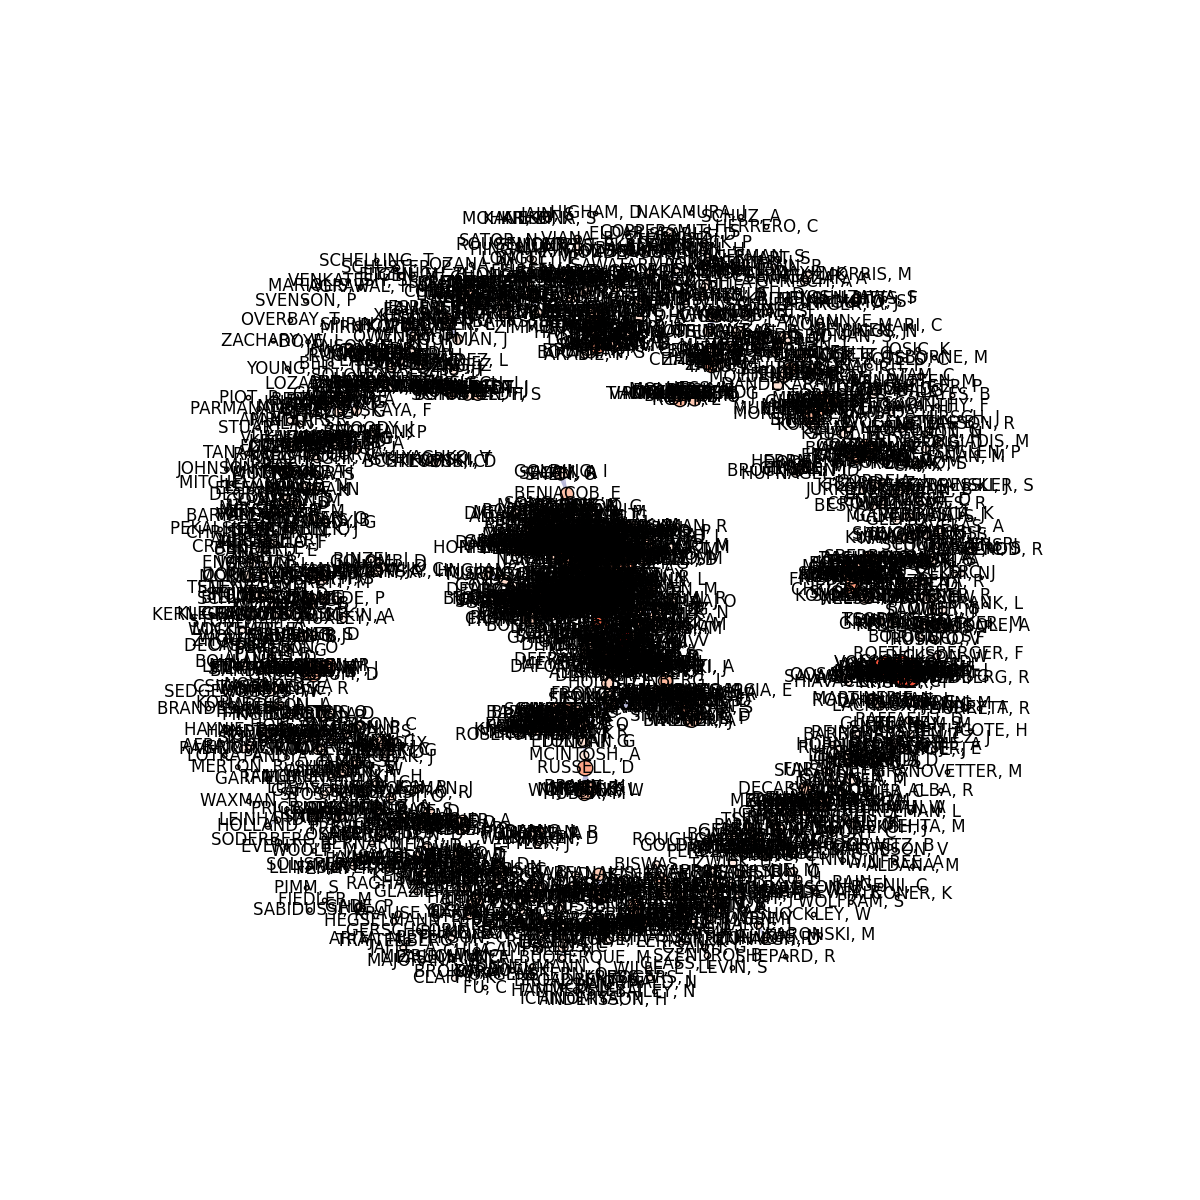

In [5]:
layoutFig = plt.figure(figsize=(12,12))
            
nx.draw(g,  
         with_labels=True,                 # Turn off the labels for initial view (reduces visual clutter)
         labels=labels,                     # Give the label of each node
         node_size=nodeSizes,               # Give the node sizes
         node_color=nodeValuesColorMapping, # Give the values for the color mapping
         cmap=plt.cm.Reds,                  # PyPlot colormap called Reds (color map from light red to dark red)
         edge_color=matplotlib.colors.rgb2hex(plt.cm.Purples(100)) # Give the edge color (light purple)
    )

Now that we retreived the names of the big collaborators, [A. Barabasi](https://scholar.google.com/citations?user=vsj2slIAAAAJ), [H. Jeong](https://scholar.google.nl/citations?user=-Jhj6swAAAAJ&hl=nl) and [M. Newman](https://scholar.google.com/citations?user=rQ68pVwAAAAJ&hl=nl), it might be useful to look at a subgraph of all the nodes connected to one of the big collaborators.

<IPython.core.display.Javascript object>


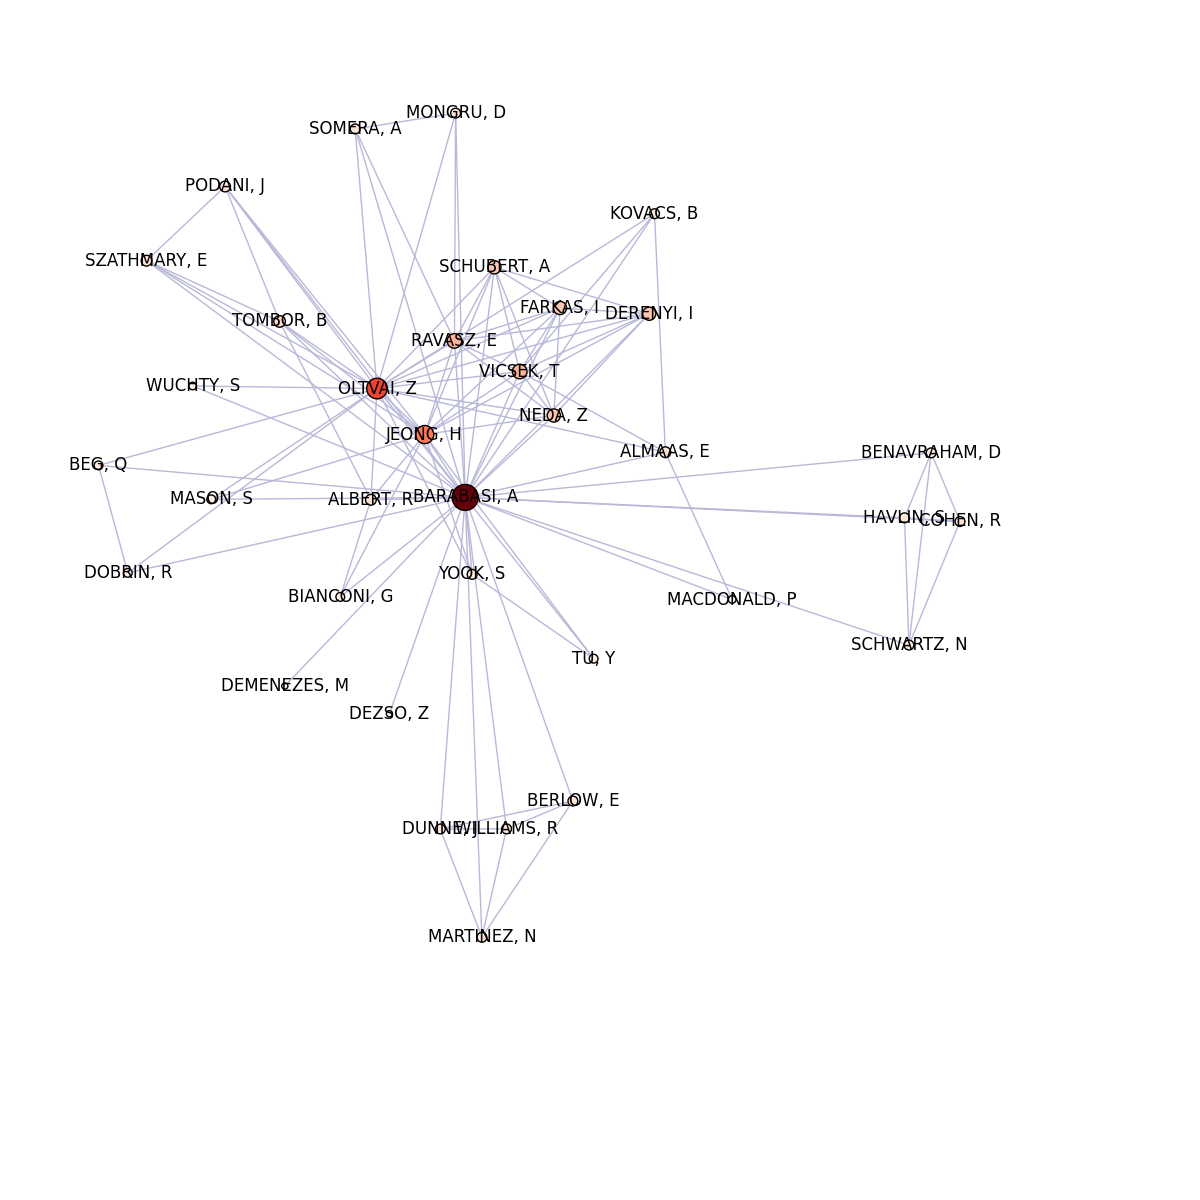

In [6]:
subGraphFig = plt.figure(figsize=(12,12));

bigCollabName = 'BARABASI, A'; # The name you want to have a subgraph of

# Now lets find the node of the big collaborator
bigCollab = '';
for n in g:                                # Iterate through all the nodes in the graph
    if g.nodes[n]['label']==bigCollabName:  # Check if the current node has the label of the big collaborator
        bigCollab = n;                     # Store the node in the bigCollab variable

subG = nx.ego_graph(g, bigCollab); # Make a subgraph of all connected nodes to the big collaborator

# Make the variables again for the subgraph's graph drawing
# A list for the size of every node in the graph based on their degree (the amount of connected neighbours)
subNodeSizes  = [10*(len(subG[node[0]])+1) for node in subG.nodes(data=True)] 

# A list for the color of every node in the graph based on their degree (the amount of connected neighbours)
subNodeValuesColorMapping = [10*len(subG[node[0]]) for node in subG.nodes(data=True)] 

# A dictionary with key:nodeId and value:labelname to label each node in the visualisation
subLabels     = {node[0]: node[1]['label'] for node in subG.nodes(data=True)} 

nx.draw(subG, 
         with_labels=True,                 # Turn off the labels for initial view (reduces visual clutter)
         labels=subLabels,                     # Give the label of each node
         node_size=subNodeSizes,               # Give the node sizes
         node_color=subNodeValuesColorMapping, # Give the values for the color mapping
         cmap=plt.cm.Reds,                  # PyPlot colormap called Reds (color map from light red to dark red)
         edge_color=matplotlib.colors.rgb2hex(plt.cm.Purples(100)) # Give the edge color (light purple)
    )

We can also look if we can find the subgraph that includes all the big collaborators and see if they are connected in any way.

<IPython.core.display.Javascript object>


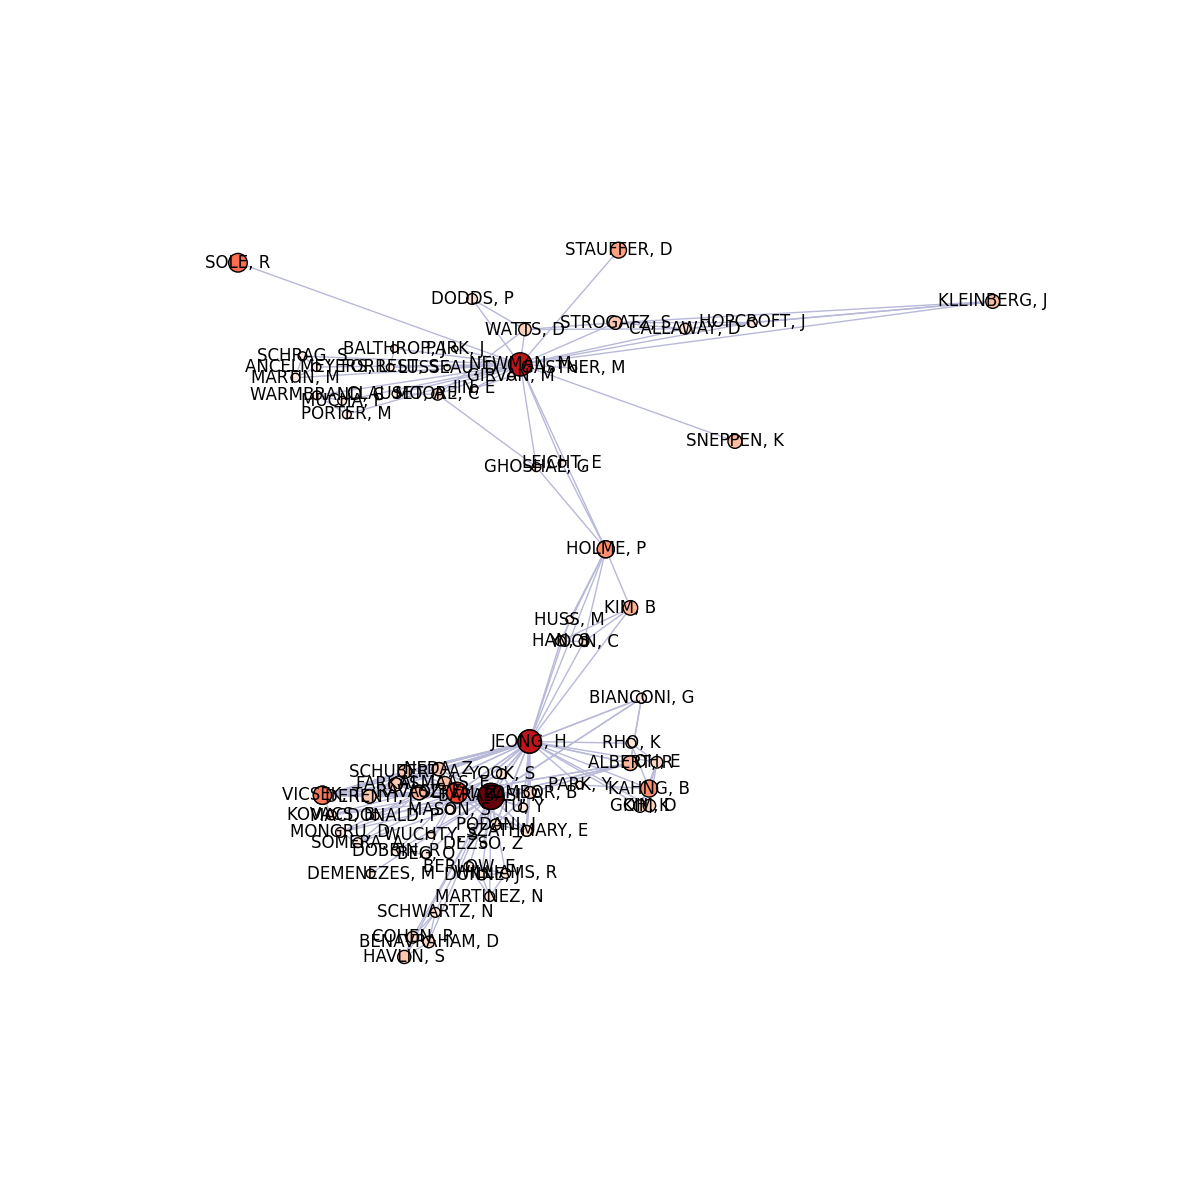

In [7]:
subGraphFig = plt.figure(figsize=(12,12));

barabasi = 'BARABASI, A'; # The name you want to have a subgraph of

# Now lets find the node of the big collaborator
barabasiId = '';
for n in g:                                # Iterate through all the nodes in the graph
    if g.nodes[n]['label']==barabasi:  # Check if the current node has the label of the big collaborator
        barabasiId = n;                     # Store the node in the bigCollab variable

subGBaraBasi = nx.ego_graph(g, barabasiId); # Make a subgraph of all connected nodes to the big collaborator

jeong = 'JEONG, H'; # The name you want to have a subgraph of

# Now lets find the node of the big collaborator
jeongId = '';
for n in g:                                # Iterate through all the nodes in the graph
    if g.nodes[n]['label']==jeong:  # Check if the current node has the label of the big collaborator
        jeongId = n;                     # Store the node in the bigCollab variable

subGJeong = nx.ego_graph(g, jeongId); # Make a subgraph of all connected nodes to the big collaborator

newman = 'NEWMAN, M'; # The name you want to have a subgraph of

# Now lets find the node of the big collaborator
newmanId = '';
for n in g:                                # Iterate through all the nodes in the graph
    if g.nodes[n]['label']==newman:  # Check if the current node has the label of the big collaborator
        newmanId = n;                     # Store the node in the bigCollab variable

subGNewman = nx.ego_graph(g, newmanId); # Make a subgraph of all connected nodes to the big collaborator

#Combine all nodes and edges so that we can use them for plotting
combinedNodes = list(subGBaraBasi.nodes(data=True)) + list(subGJeong.nodes(data=True)) + list(subGNewman.nodes(data=True))
combinedEdges = list(subGBaraBasi.edges()) + list(subGJeong.edges()) + list(subGNewman.edges())

# Make the variables again for the subgraph's graph drawing
# A list for the size of every node in the graph based on their degree (the amount of connected neighbours)
subNodeSizes  = [10*(len(g[node[0]])+1) for node in combinedNodes] 

# A list for the color of every node in the graph based on their degree (the amount of connected neighbours)
subNodeValuesColorMapping = [10*len(g[node[0]]) for node in combinedNodes] 

# A dictionary with key:nodeId and value:labelname to label each node in the visualisation
subLabels     = {node[0]: node[1]['label'] for node in combinedNodes} 
            
nx.draw(g, 
         nodelist=[node[0] for node in combinedNodes], # only extract index
         edgelist=combinedEdges,           # Only display the relevant edges
         with_labels=True,                 # Turn off the labels for initial view (reduces visual clutter)
         labels=subLabels,                     # Give the label of each node
         node_size=subNodeSizes,               # Give the node sizes
         node_color=subNodeValuesColorMapping, # Give the values for the color mapping
         cmap=plt.cm.Reds,                  # PyPlot colormap called Reds (color map from light red to dark red)
         edge_color=matplotlib.colors.rgb2hex(plt.cm.Purples(100)) # Give the edge color (light purple)
    )

Now that we have seen some of the capabilities of the python package Networkx you can have a look at example of the same graph but then implemented with D3js to add some interactivity in the [Appendix A. D3js examples](./A.&#32;D3js&#32;examples.ipynb).

This concludes the Network graphs course material now you may proceed to the Geographical plots notebook by clicking on the following link: [Geographical plots](./4.&#32;Geographical&#32;plots.ipynb).